# Question 2

## Load data

In [2]:
import pandas as pd

df = pd.read_csv('MFH cost Jan 2018.csv', low_memory=False)

In [3]:
df.shape

(39139, 540)

In [52]:
# ', '.join(sorted(df.columns))

In [14]:
df[['age', 'dayssurvived']].isna().sum() / df.shape[0]

age             0.320243
dayssurvived    0.603388
dtype: float64

## Step 2

In [20]:
df[['age', 'gender', 'dayssurvived', 'Daily All Cost']].describe()

,age,dayssurvived,Daily All Cost
count,26605.000000,15523.000000,39139.000000
mean,72.159895,1398.196289,250.493208
std,12.403902,969.020255,325.002145
min,22.000000,14.000000,0.000000
25%,63.000000,687.000000,85.837450
50%,73.000000,1107.000000,180.140400
75%,83.000000,1830.500000,299.267589
max,105.000000,6210.000000,12210.619010


In [21]:
df[['age', 'gender', 'dayssurvived', 'Daily All Cost']].isna().sum() / df.shape[0]

age               0.320243
gender            0.320167
dayssurvived      0.603388
Daily All Cost    0.000000
dtype: float64

## Step 3

<AxesSubplot:ylabel='Density'>

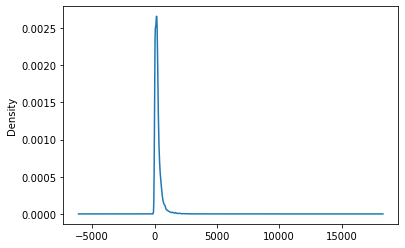

In [50]:
s = df.dropna(subset=['Daily All Cost'])['Daily All Cost']
s = s[s > 0]
s.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

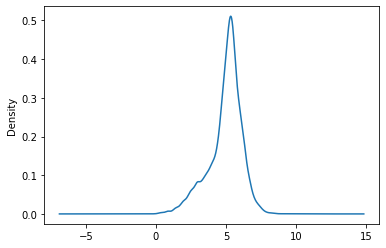

In [31]:
import numpy as np

s = df.dropna(subset=['Daily All Cost'])['Daily All Cost']
s = s[s > 0]
s = np.log(s)
s.plot(kind='kde')

## Step 4

<AxesSubplot:xlabel='age', ylabel='Daily All Cost'>

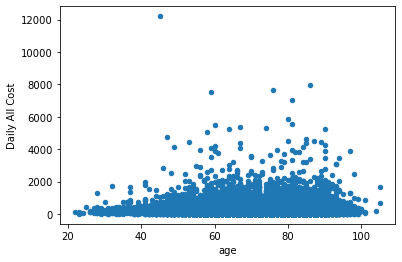

In [32]:
df.plot(kind='scatter', x='age', y='Daily All Cost')

## Step 5

In [37]:
df['gender'].value_counts()

M    25583
F     1025
Name: gender, dtype: int64

In [40]:
X = df.dropna(subset=['age', 'gender', 'Daily All Cost'])
X = X[X['Daily All Cost'] > 0]
X['gender'] = X['gender'].apply(lambda v: 1 if v == 'M' else 0)
X, y = X[['age', 'gender']], X['Daily All Cost']

X.shape, y.shape

((26605, 2), (26605,))

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

model.intercept_, model.coef_

(264.3420036647272, array([0.12883604, 0.63987923]))

In [48]:
from sklearn.metrics import r2_score, explained_variance_score

r2_score(y, model.predict(X)), np.sqrt(r2_score(y, model.predict(X)))

(2.242432612920009e-05, 0.004735433045583063)